In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [63]:
data = pd.read_excel(r"D:\\myProjects\\clustering\\p1_cust\\online_retail_II.xlsx",sheet_name=0)

## Analysis

In [64]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


6   Customer ID  417534

In [66]:
data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [67]:
data.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [68]:
data[data['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [69]:
data[data['Quantity'] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [70]:
data['Invoice'] = data['Invoice'].astype("str")
data[data['Invoice'].str.match("^\\d{6}$")] # 6 digits 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [71]:
data[data['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


'C' for cancellation 

In [72]:
data['Invoice'].replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [73]:
data[data['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [74]:
data['StockCode'] = data['StockCode'].astype(str)
data[data['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [75]:
data[
    (data['StockCode'].str.match('^\\d{5}$') == False) &
    (data['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)
    ]['StockCode'].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [76]:
data[data['StockCode'].str.contains("DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


## Cleaning

In [77]:
cleaned_df = data.copy()

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

In [78]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype("str")
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [79]:
cleaned_df[cleaned_df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

In [80]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype("str")
mask = (
    cleaned_df['StockCode'].str.match("^\\d{5}$") |
    cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]$") |
    cleaned_df['StockCode'].str.match("^PADS$")
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [81]:
cleaned_df[cleaned_df['StockCode'].str.contains('gift_0001_30')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [82]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)

C:\Users\windows\AppData\Local\Temp\ipykernel_6676\1864003155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'],inplace=True)


In [83]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,405555.000000,405555,405555.000000,405555.000000
mean,13.624024,2010-07-01 12:37:55.533823744,2.985737,15373.275965
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:16:00,1.250000,14004.000000
50%,5.000000,2010-07-11 10:28:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:23:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.075664,NaN,4.287946,1677.247500


In [84]:
len(cleaned_df[cleaned_df['Price'] <= 0])

28

In [85]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0 ]

In [86]:
len(cleaned_df[cleaned_df['Price'] <= 0])

0

In [87]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,405527.000000,405527,405527.000000,405527.000000
mean,13.622846,2010-07-01 12:41:15.852705280,2.985943,15373.365389
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:16:00,1.250000,14004.000000
50%,5.000000,2010-07-11 10:28:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:23:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.073841,NaN,4.288022,1677.211001


In [88]:
dropSum = len(data) - len(cleaned_df)
dropSum

119934

In [89]:
dropSum / len(data)

0.2282452931806547

Dropped about 23% of data recordes

# Featuer Engineering 

In [90]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [91]:
# total sales 
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']

C:\Users\windows\AppData\Local\Temp\ipykernel_6676\2754945469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity'] * cleaned_df['Price']


In [92]:
aggregated_df = cleaned_df.groupby(by='Customer ID',as_index=False)\
    .agg(
        Monetary_value=('SalesLineTotal','sum'),
        Frequency=('Invoice','nunique'),
        LastInvoiceDate=('InvoiceDate','max')
    )
    
aggregated_df.head(5)

,Customer ID,Monetary_value,Frequency,LastInvoiceDate
0,12346.0,163.41,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [93]:
max_invoice_data = aggregated_df['LastInvoiceDate'].max()
print(max_invoice_data)

aggregated_df['Recency'] = (max_invoice_data - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head(5)

2010-12-09 20:01:00


,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency
0,12346.0,163.41,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


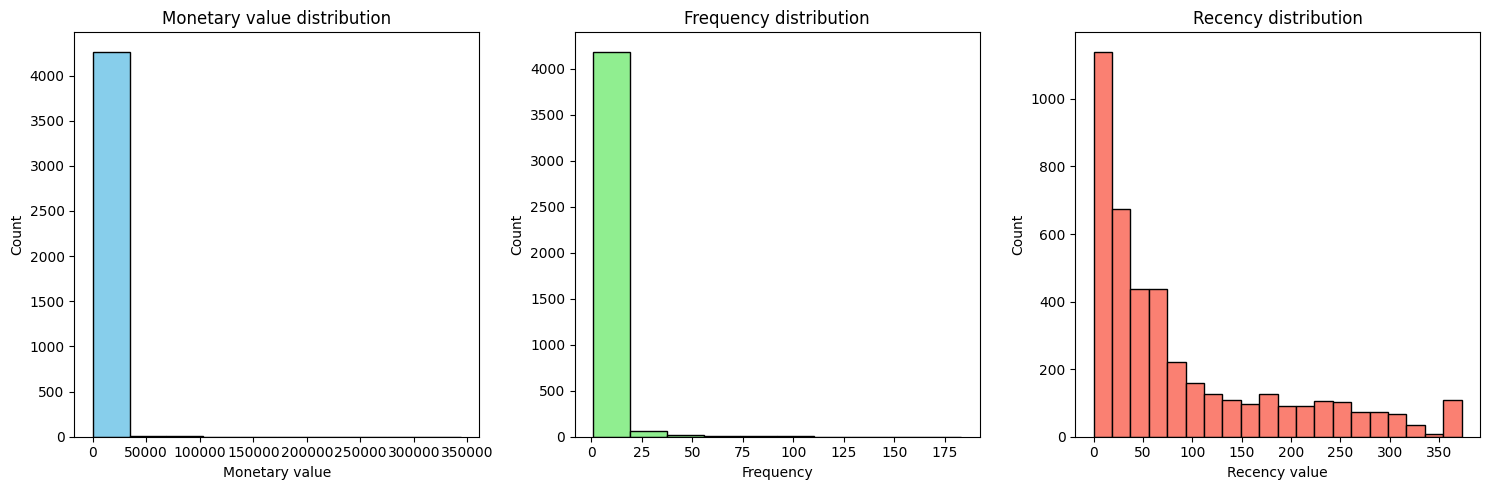

In [94]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['Monetary_value'],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetary value distribution')
plt.xlabel('Monetary value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'],bins=10,color='lightgreen',edgecolor='black')
plt.title('Frequency distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'],bins=20,color='salmon',edgecolor='black')
plt.title('Recency distribution')
plt.xlabel('Recency value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Outliers in Monetary and Frequency

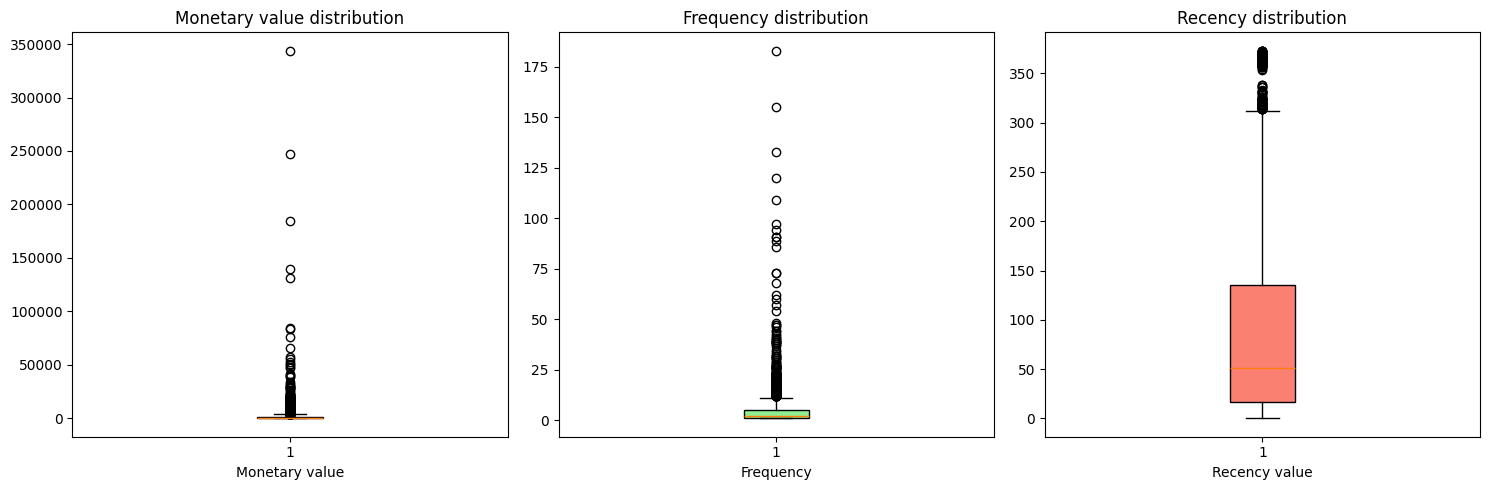

In [95]:
# plt.figure(figsize=(15,5))

# plt.subplot(1,3,1)
# plt.boxplot(data=aggregated_df['Monetary_value'],color='skyblue')
# plt.title('Monetary value distribution')
# plt.xlabel('Monetary value')

# plt.subplot(1,3,2)
# plt.boxplot(data=aggregated_df['Frequency'],color='lightgreen')
# plt.title('Frequency distribution')
# plt.xlabel('Frequency')

# plt.subplot(1,3,3)
# plt.boxplot(data=aggregated_df['Recency'],color='salmon')
# plt.title('Recency distribution')
# plt.xlabel('Recency value')

# plt.tight_layout()
# plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(aggregated_df['Monetary_value'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Monetary value distribution')
plt.xlabel('Monetary value')

plt.subplot(1,3,2)
plt.boxplot(aggregated_df['Frequency'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Frequency distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
plt.boxplot(aggregated_df['Recency'], patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Recency distribution')
plt.xlabel('Recency value')

plt.tight_layout()
plt.show()

In [96]:
M_Q1 = aggregated_df['Monetary_value'].quantile(0.25)
M_Q3 = aggregated_df['Monetary_value'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
Monetary_outliers = aggregated_df[
        (aggregated_df['Monetary_value'] > (M_Q3 + 1.5 * M_IQR)) | 
        (aggregated_df['Monetary_value'] < (M_Q1 - 1.5 * M_IQR))
    ].copy()

Monetary_outliers.describe()

,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency
count,421.000000,421.000000,421.000000,421,421.000000
mean,15107.242280,12150.487568,17.225653,2010-11-09 16:56:38.764845568,29.847981
min,12357.000000,3796.930000,1.000000,2009-12-10 18:03:00,0.000000
25%,13615.000000,4590.530000,8.000000,2010-11-08 15:42:00,3.000000
50%,15005.000000,6191.320000,12.000000,2010-11-26 12:44:00,13.000000
75%,16700.000000,10164.490000,18.000000,2010-12-06 11:06:00,31.000000
max,18260.000000,343764.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1731.684418,25632.405012,19.758275,NaN,51.563698


In [97]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)

F_IQR = F_Q3 - F_Q1
Frequency_outliers = aggregated_df[
        (aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | 
        (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))
    ].copy()

Frequency_outliers.describe()

,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14309.816724,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1088.440000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4321.670000,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6590.060000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,343764.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31069.985754,21.932937,NaN,26.589117


In [98]:
non_outliersDf=aggregated_df[
                (~aggregated_df.index.isin(Monetary_outliers.index)) & 
                (~aggregated_df.index.isin(Frequency_outliers.index))
                ]

non_outliersDf.describe()

,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency
count,3811.000000,3811.000000,3811.000000,3811,3811.000000
mean,15375.875098,884.438897,2.864602,2010-09-03 11:37:33.077932288,97.067699
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.500000,277.925000,1.000000,2010-07-08 16:27:00,22.000000
50%,15387.000000,587.690000,2.000000,2010-10-12 16:25:00,58.000000
75%,16851.000000,1269.070000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1692.963969,816.814742,2.244160,NaN,98.089381


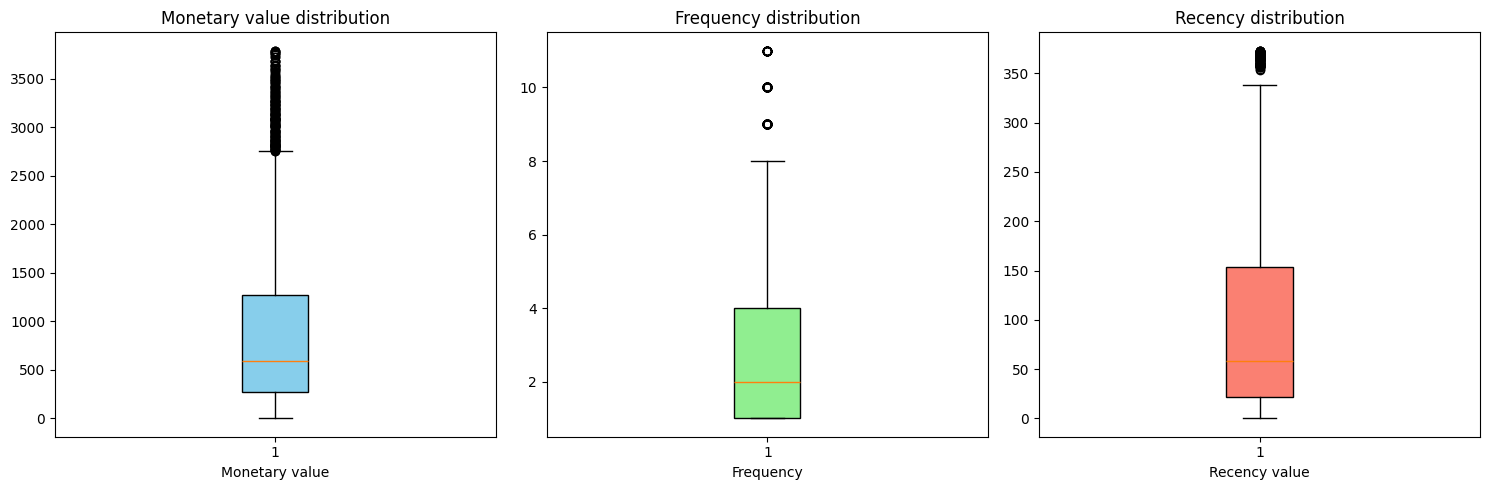

In [99]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(non_outliersDf['Monetary_value'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Monetary value distribution')
plt.xlabel('Monetary value')

plt.subplot(1,3,2)
plt.boxplot(non_outliersDf['Frequency'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Frequency distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
plt.boxplot(non_outliersDf['Recency'], patch_artist=True, boxprops=dict(facecolor='salmon'))
plt.title('Recency distribution')
plt.xlabel('Recency value')

plt.tight_layout()
plt.show()

In [100]:
non_outliersDf.columns

Index(['Customer ID', 'Monetary_value', 'Frequency', 'LastInvoiceDate',
       'Recency'],
      dtype='object')

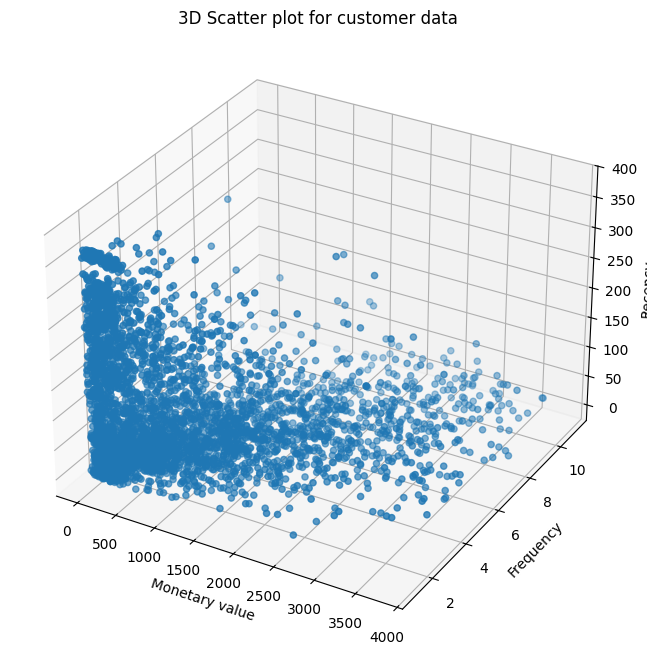

In [101]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliersDf['Monetary_value'],non_outliersDf['Frequency'],non_outliersDf['Recency'])
ax.set_xlabel('Monetary value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter plot for customer data')
plt.show()

In [102]:
# Scalling 
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliersDf[['Monetary_value','Frequency','Recency']])
scaled_data


array([[-0.88284831, -0.38531824,  0.68244986],
       [ 0.53737852, -0.38531824, -0.96932179],
       [-0.81213757, -0.83097766, -0.24539718],
       ...,
       [-0.62132263, -0.83097766,  2.01814175],
       [ 0.44323221, -0.38531824,  0.14205543],
       [ 1.72800052,  0.50600061, -0.81637997]])

In [103]:
scaled_df = pd.DataFrame(scaled_data,index=non_outliersDf.index,columns=['Monetary_value','Frequency','Recency'])
scaled_df

,Monetary_value,Frequency,Recency
0,-0.882848,-0.385318,0.682450
1,0.537379,-0.385318,-0.969322
2,-0.812138,-0.830978,-0.245397
3,1.636695,-0.385318,-0.561477
4,-0.714465,-0.830978,-0.887753
...,...,...,...
4280,-0.297131,1.397319,-0.816380
4281,-0.578859,-0.830978,-0.316770
4282,-0.621323,-0.830978,2.018142
4283,0.443232,-0.385318,0.142055


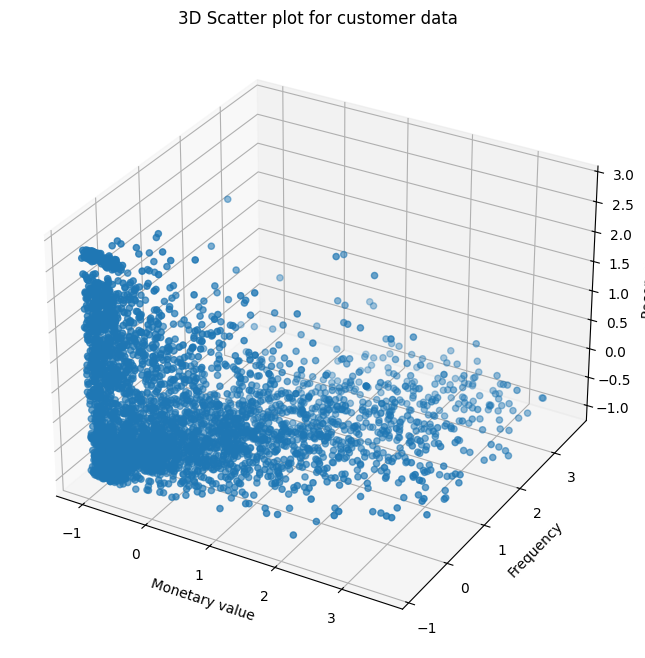

In [104]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_df['Monetary_value'],scaled_df['Frequency'],scaled_df['Recency'])
ax.set_xlabel('Monetary value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter plot for customer data')
plt.show()

# KMeans Clustering 

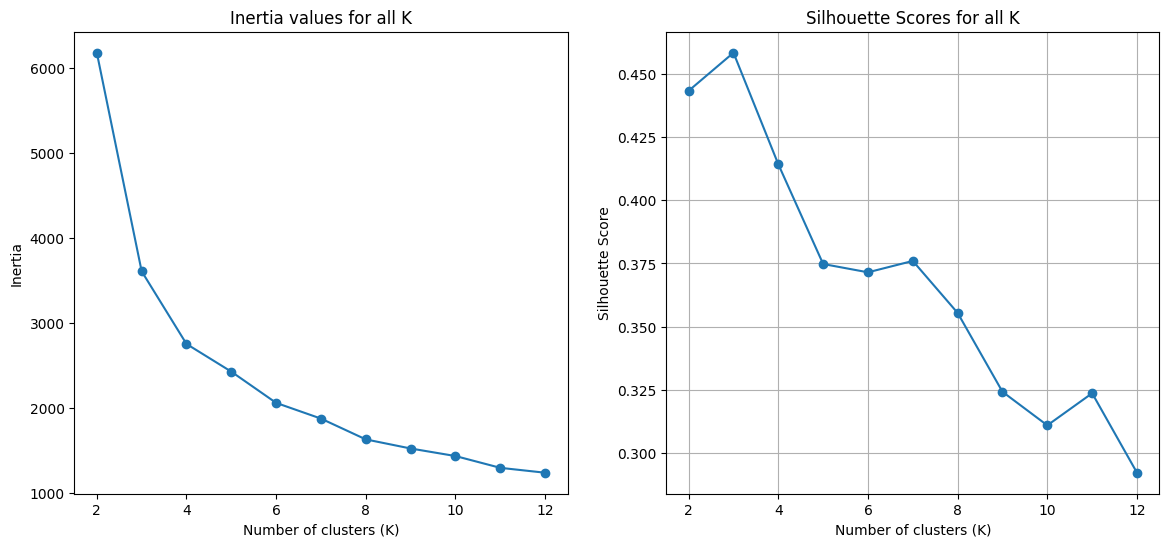

In [105]:
max_k = 12
inertia = []
silhouetteScores = []

k_values = range(2, max_k + 1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=100)
    kmeans.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    inertia.append(kmeans.inertia_)
    silhouetteScores.append(score)

plt.figure(figsize=(14, 6))

# Corrected subplot index for inertia
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia values for all K')

# Corrected subplot index for silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouetteScores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for all K')

plt.grid(True)
plt.show()

then we have 4 colusters 

In [106]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=100)
clusterLabels = kmeans.fit_predict(scaled_df)
clusterLabels

array([0, 1, 3, ..., 0, 1, 1])

In [107]:
non_outliersDf['clusterLabels'] = clusterLabels
non_outliersDf.head()

C:\Users\windows\AppData\Local\Temp\ipykernel_6676\1497156257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliersDf['clusterLabels'] = clusterLabels


,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency,clusterLabels
0,12346.0,163.41,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,1
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3


In [108]:
non_outliersDf['clusterLabels'].value_counts()

clusterLabels
3    1485
1     915
0     902
2     509
Name: count, dtype: int64

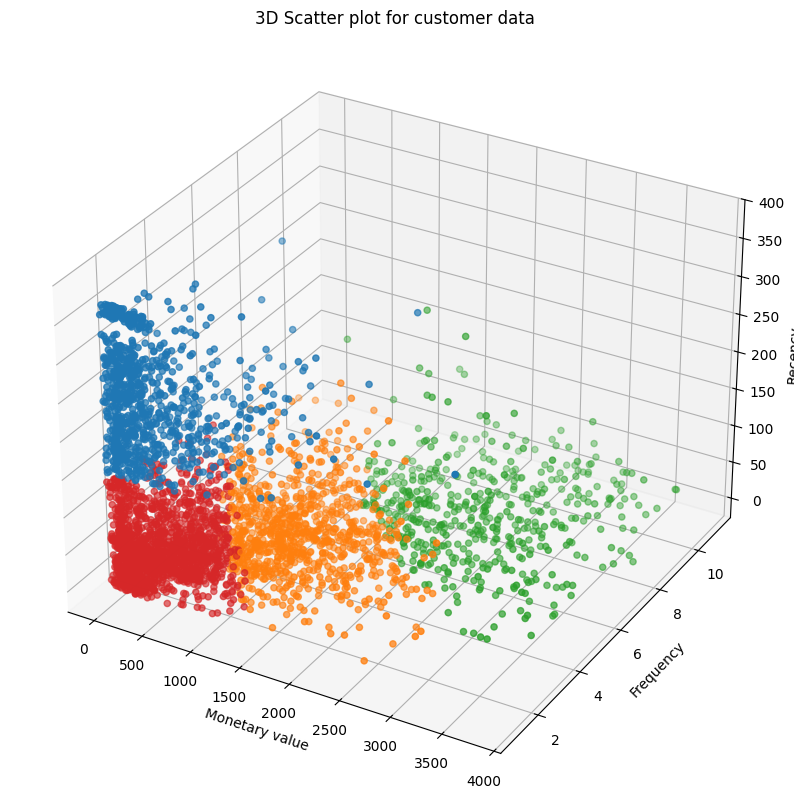

In [109]:
cluster_colors = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#2ca02c',
    3: '#d62728'
}

colors = non_outliersDf['clusterLabels'].map(cluster_colors)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(
    non_outliersDf['Monetary_value'],
    non_outliersDf['Frequency'],
    non_outliersDf['Recency'],
    c=colors,
    marker='o'
)
ax.set_xlabel('Monetary value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter plot for customer data')
plt.show()

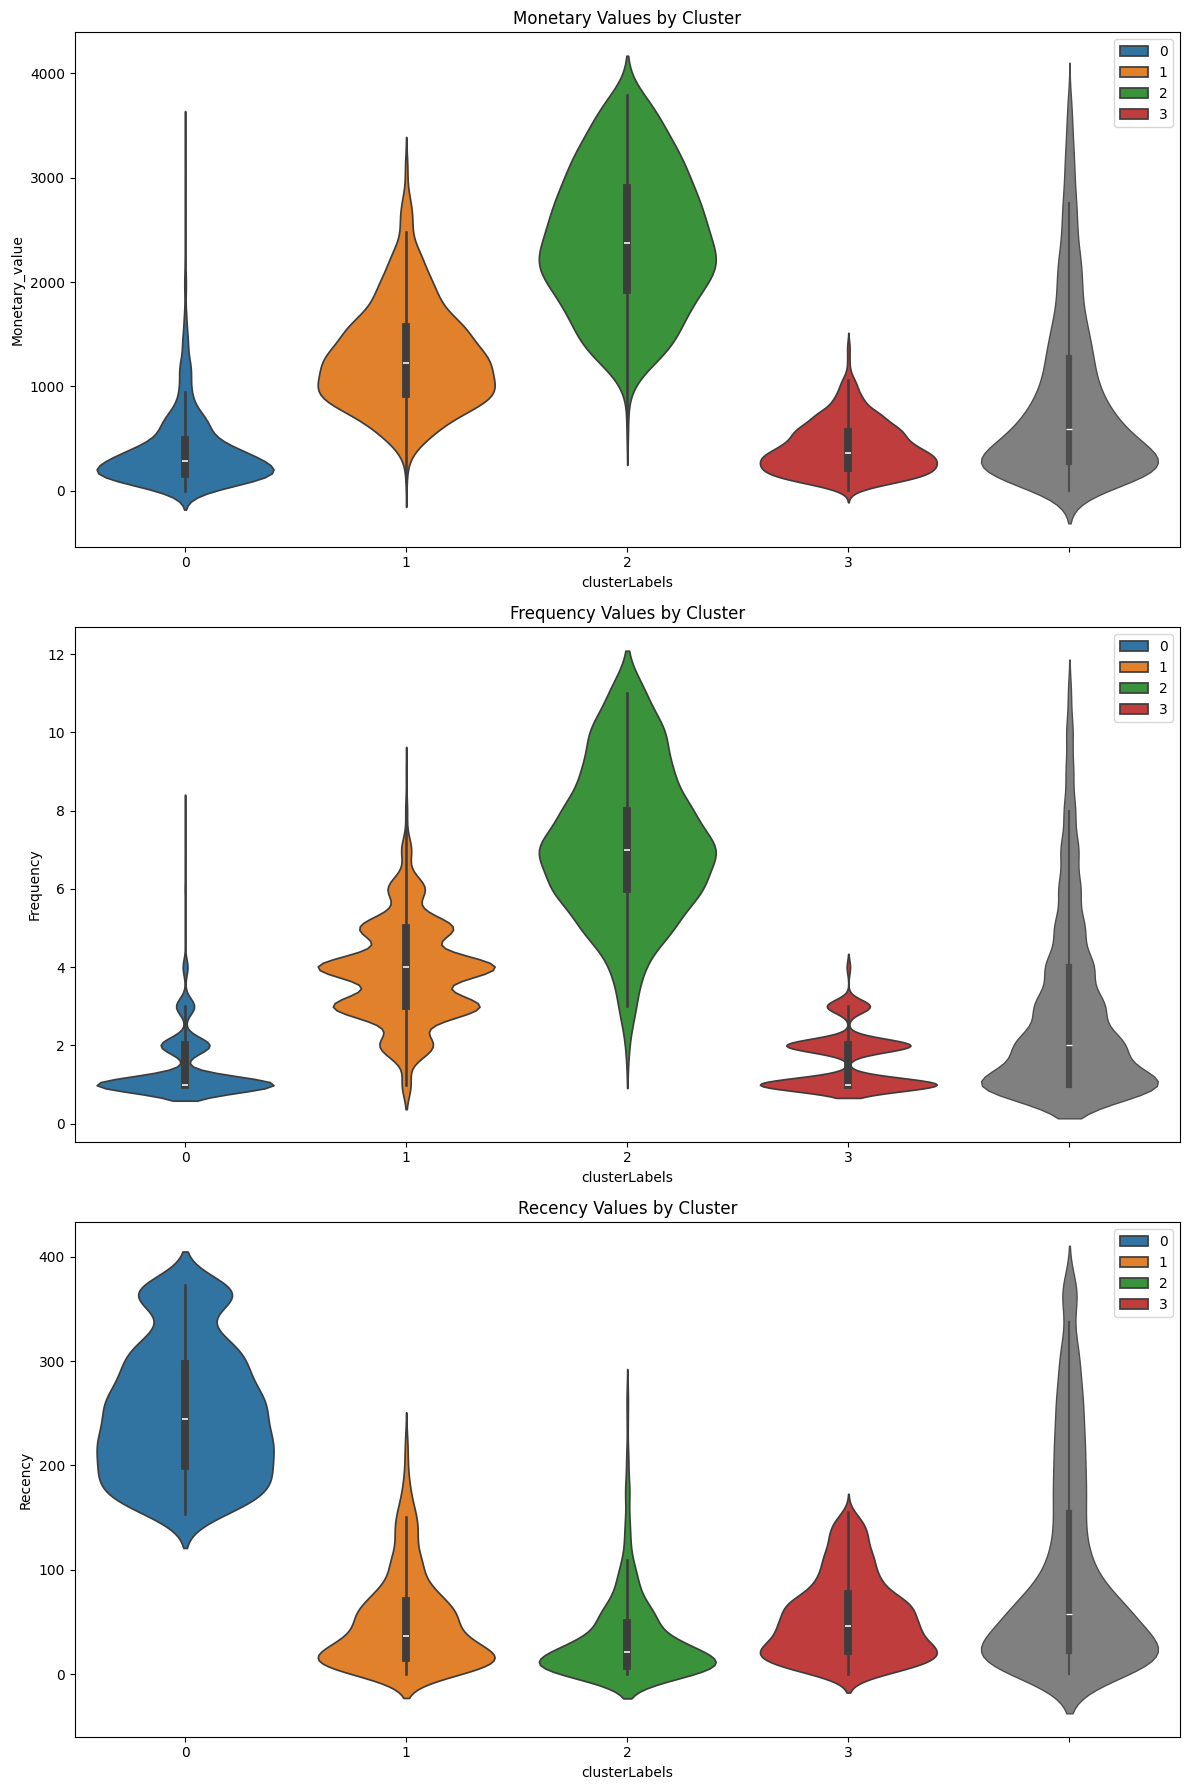

In [110]:
# sns.violinplot(x='HeartDisease', y='Age', data=df)
# plt.title("Age distribution by Heart Disease")
# plt.show()

plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(
    x=non_outliersDf['clusterLabels'],
    y=non_outliersDf['Monetary_value'],
    palette=cluster_colors,
    hue=non_outliersDf['clusterLabels']
    )
sns.violinplot(y=non_outliersDf['Monetary_value'],color='gray',linewidth=1.0)
plt.title('Monetary Values by Cluster')


plt.subplot(3,1,2)
sns.violinplot(
    x=non_outliersDf['clusterLabels'],
    y=non_outliersDf['Frequency'],
    palette=cluster_colors,
    hue=non_outliersDf['clusterLabels']
    )
sns.violinplot(y=non_outliersDf['Frequency'],color='gray',linewidth=1.0)
plt.title('Frequency Values by Cluster')


plt.subplot(3,1,3)
sns.violinplot(
    x=non_outliersDf['clusterLabels'],
    y=non_outliersDf['Recency'],
    palette=cluster_colors,
    hue=non_outliersDf['clusterLabels']
    )
sns.violinplot(y=non_outliersDf['Recency'],color='gray',linewidth=1.0)
plt.title('Recency Values by Cluster')
plt.tight_layout()
plt.show()

Cluster 0 (Blue): "Inactive / Churned"
- **Monetary:** Low spending  
- **Frequency:** Low purchase frequency  
- **Recency:** High (haven’t purchased for a long time)

**Description:**  
These are inactive or churned customers. They’ve likely stopped buying or are no longer engaged.

**Suggested Action:**  
Avoid heavy investment. Consider a basic reactivation email or offer to attempt bringing them back.

---

Cluster 1 (Orange): "Re-engage / Growing"
- **Monetary:** Medium spending  
- **Frequency:** Medium frequency  
- **Recency:** Low (recent purchases)

**Description:**  
Moderately active customers with potential to become loyal.

**Suggested Action:**  
Encourage repeat purchases with targeted campaigns, loyalty rewards, or personalized discounts.

---

Cluster 2 (Green): "Loyal / VIP"
- **Monetary:** Highest spending  
- **Frequency:** Most frequent buyers  
- **Recency:** Very low (very recent activity)

**Description:**  
These are your VIP customers. They spend the most, buy frequently, and stay active.

**Suggested Action:**  
Retain them through loyalty programs, special treatment, and VIP offers. Keep them engaged.

---

Cluster 3 (Red): "Occasional / Low-Value"
- **Monetary:** Low spending  
- **Frequency:** Low  
- **Recency:** Medium

**Description:**  
These are occasional buyers with limited activity and value.

**Suggested Action:**  
Use light promotions, reminders, or seasonal campaigns to increase their engagement.

---

📊 Cluster Summary Table

| Cluster | Color  | Monetary 💰 | Frequency 🔁 | Recency ⏳ | Description                | Suggested Label        |
|--------|--------|-------------|--------------|-------------|----------------------------|------------------------|
| 0      | Blue   | Low          | Low           | High        | Inactive / Churned         | "Inactive / Churned"   |
| 1      | Orange | Medium       | Medium        | Low         | Moderate, growing          | "Re-engage / Growing"  |
| 2      | Green  | High         | High          | Very Low    | VIP and loyal              | "Loyal / VIP"          |
| 3      | Red    | Low          | Low           | Medium      | Occasional buyers          | "Occasional"           |


In [122]:
cluster_Names = {
    0: "INACTIVE",
    1: "RE-ENGAGE",
    2: "LOYAL",
    3: "OCCASIONAL",
}


In [126]:
non_outliersDf['clusterLabels'].value_counts()

clusterLabels
3    1485
1     915
0     902
2     509
Name: count, dtype: int64

In [112]:
Monetary_outliers.count()

Customer ID        421
Monetary_value     421
Frequency          421
LastInvoiceDate    421
Recency            421
dtype: int64

In [113]:
Frequency_outliers.count()

Customer ID        279
Monetary_value     279
Frequency          279
LastInvoiceDate    279
Recency            279
dtype: int64

In [114]:
overlapIndices = Monetary_outliers.index.intersection(Frequency_outliers.index)

monetaryOnly_outliers = Monetary_outliers.drop(overlapIndices)
frequencyOnly_outliers = Frequency_outliers.drop(overlapIndices)
monetaryAndfrequency_outliers = Monetary_outliers.loc[overlapIndices]
"""
difference between iloc and loc 
loc for Labels 
iloc for index
"""

monetaryOnly_outliers['clusterLabels'] = -1
frequencyOnly_outliers['clusterLabels']  = -2
monetaryAndfrequency_outliers['clusterLabels']  = -3

finalOutliers = pd.concat([monetaryOnly_outliers,frequencyOnly_outliers,monetaryAndfrequency_outliers])
finalOutliers

,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency,clusterLabels
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7409.21,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


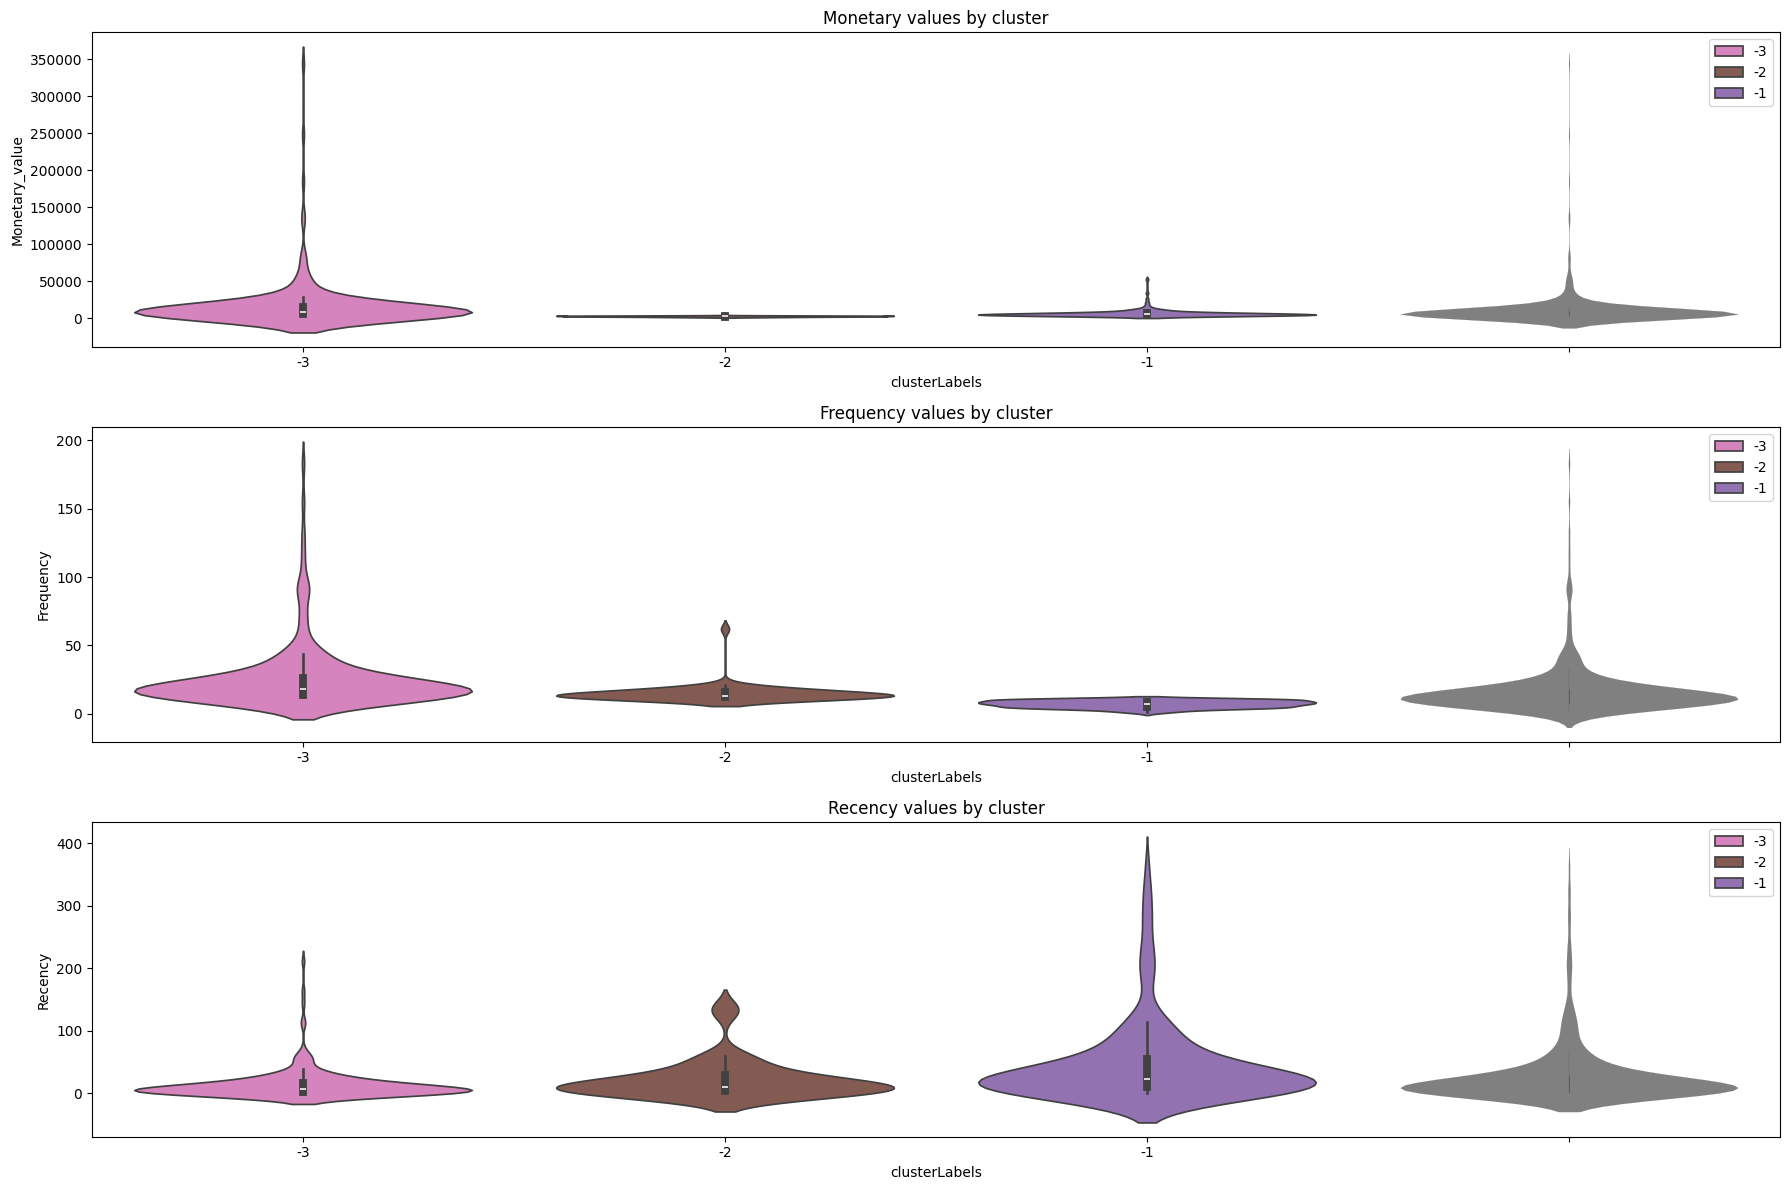

In [115]:
cluster_colors = {
    -1: '#9467bd',
    -2: '#8c564b',
    -3: '#e377c2'
    }


plt.figure(figsize=(18,12))
plt.subplot(3,1,1)
sns.violinplot(
    x=finalOutliers['clusterLabels'],
    y=finalOutliers['Monetary_value'],
    palette=cluster_colors,
    hue=finalOutliers['clusterLabels']
)
sns.violinplot(y=finalOutliers['Monetary_value'],color='gray',linewidth=0.1)
plt.title('Monetary values by cluster')

plt.subplot(3,1,2)
sns.violinplot(
    x=finalOutliers['clusterLabels'],
    y=finalOutliers['Frequency'],
    palette=cluster_colors,
    hue=finalOutliers['clusterLabels']
)
sns.violinplot(y=finalOutliers['Frequency'],color='gray',linewidth=0.1)
plt.title('Frequency values by cluster')

plt.subplot(3,1,3)
sns.violinplot(
    x=finalOutliers['clusterLabels'],
    y=finalOutliers['Recency'],
    palette=cluster_colors,
    hue=finalOutliers['clusterLabels']
)
sns.violinplot(y=finalOutliers['Recency'],color='gray',linewidth=0.1)
plt.title('Recency values by cluster')

plt.tight_layout()
plt.show()



* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [116]:
clustring_df = pd.concat([non_outliersDf,finalOutliers])
clustring_df

,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency,clusterLabels
0,12346.0,163.41,2,2010-06-28 13:53:00,164,0
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,1
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,1
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4235,18223.0,7409.21,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [117]:
clustring_df['clusterLabels'].value_counts()

clusterLabels
 3    1485
 1     915
 0     902
 2     509
-3     226
-1     195
-2      53
Name: count, dtype: int64

In [123]:
cluster_Names[-1]="PAMPER"
cluster_Names[-2]="UPSELL"
cluster_Names[-3]="DELIGHT"

clustring_df['clusterName'] = clustring_df['clusterLabels'].map(cluster_Names)
clustring_df

,Customer ID,Monetary_value,Frequency,LastInvoiceDate,Recency,clusterLabels,clusterName,MonetaryValue per 100 pounds
0,12346.0,163.41,2,2010-06-28 13:53:00,164,0,INACTIVE,1.6341
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,1,RE-ENGAGE,13.2332
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3,OCCASIONAL,2.2116
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,1,RE-ENGAGE,22.2114
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3,OCCASIONAL,3.0093
...,...,...,...,...,...,...,...,...
4235,18223.0,7409.21,12,2010-11-17 12:20:00,22,-3,DELIGHT,74.0921
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT,75.4514
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT,66.5083
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT,47.9180


In [124]:
clustring_df['clusterName'].value_counts()

clusterName
OCCASIONAL    1485
RE-ENGAGE      915
INACTIVE       902
LOYAL          509
DELIGHT        226
PAMPER         195
UPSELL          53
Name: count, dtype: int64

C:\Users\windows\AppData\Local\Temp\ipykernel_6676\4077263202.py:16: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=feature_means,ax=ax2,palette='Set2',markers='o')


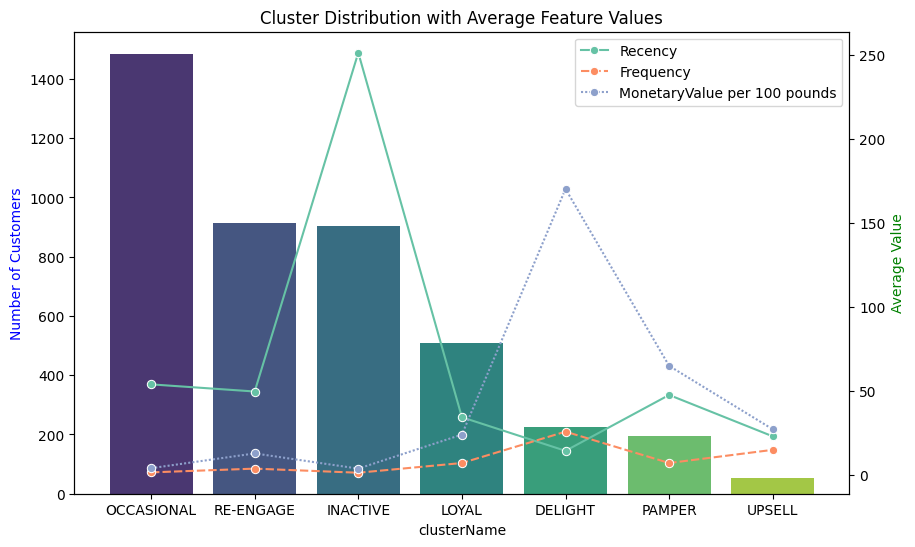

In [125]:
cluster_counts = clustring_df['clusterName'].value_counts()
clustring_df['MonetaryValue per 100 pounds'] = clustring_df['Monetary_value'] / 100
feature_means = clustring_df.groupby('clusterName')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig , ax1 = plt.subplots(figsize=(10,6))
sns.barplot(
    x=cluster_counts.index, 
    y=cluster_counts.values,
    ax=ax1, palette='viridis',
    hue=cluster_counts.index
    )
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()
sns.lineplot(data=feature_means,ax=ax2,palette='Set2',markers='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()